In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import torch
from math import isqrt
from matplotlib import pyplot as plt
import os
from PIL import Image
from functools import partial
import math
plt.style.use('seaborn')

/tmp/ipykernel_36/2457992374.py:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


## 04.08.2023 Pruning results

## convnextv2_nano.fcmae_ft_in22k_in1k

In [17]:
data = [
    ('baseline', 0.8197, 97.9, 15.6, 'red'),
    ('m0.5', 0.8155, 52.6, 9.4, 'green'),
    ('m0.3', 0.7922, 33.5, 6.3, 'green'),
    ('m0.2', 0.7531, 18.6, 3.8, 'green'),
]

In [18]:
name = [e[0] for e in data]
acc = [e[1] for e in data]
kmapp = [e[2] for e in data]
params = [e[3] for e in data]
color = [e[4] for e in data]

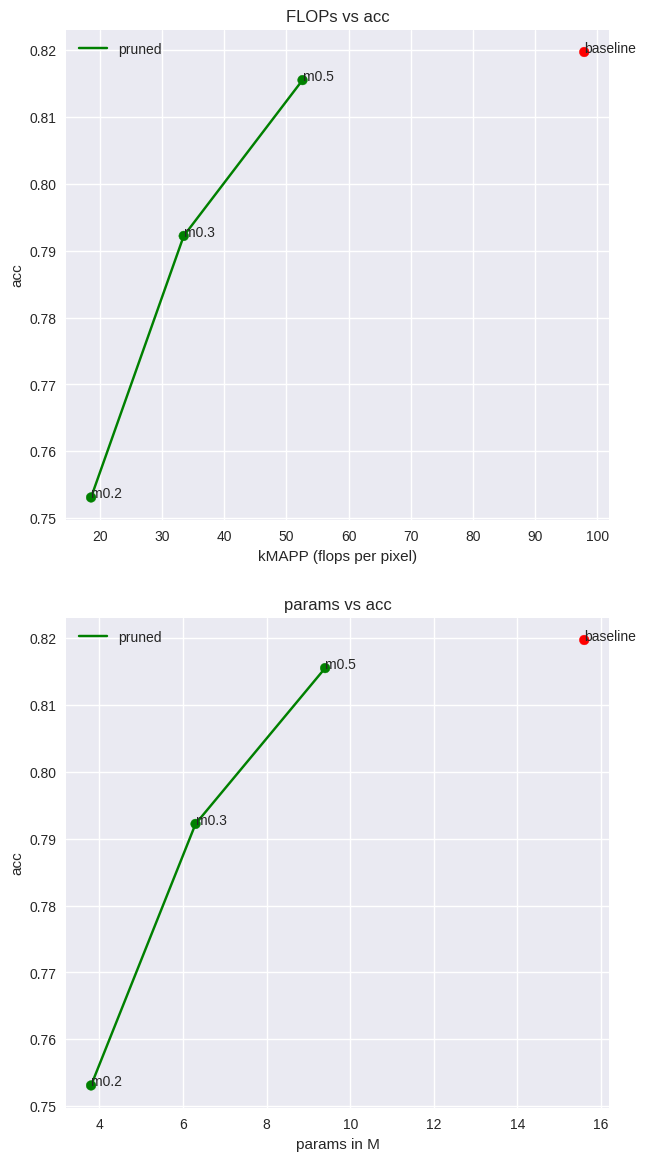

In [19]:
%matplotlib inline
fig, axes = plt.subplots(2, 1, figsize=(7,14))

FONTSIZE = 10
axes[0].scatter(kmapp, acc, c=color)
for i, txt in enumerate(name):
    axes[0].annotate(txt, (kmapp[i], acc[i]), fontsize=FONTSIZE)
axes[0].plot(kmapp[1:], acc[1:], color='green', label='pruned')
    
axes[0].set_xlabel('kMAPP (flops per pixel)')
axes[0].set_ylabel('acc')
axes[0].set_title('FLOPs vs acc')
axes[0].legend()

axes[1].scatter(params, acc, c=color)
for i, txt in enumerate(name):
    axes[1].annotate(txt, (params[i], acc[i]), fontsize=FONTSIZE)
axes[1].plot(params[1:], acc[1:], color='green', label='pruned')
    
#axes[0].set_ylim(0, 450)
#axes[0].set_xlim(0, 190)
axes[1].set_xlabel('params in M')
axes[1].set_ylabel('acc')
axes[1].set_title('params vs acc')
axes[1].legend()
    
plt.legend()
plt.show()

### resnet50d

In [13]:
data = [
    ('baseline', 0.809, 174.0, 25.6, 'red'),
    ('m0.5', 0.7975, 96.6, 16.3, 'green'),
    ('m0.375', 0.7851, 63.7, 10.9, 'green'),
    ('m0.25', 0.7721, 43.4, 7.2, 'green'),
]

In [14]:
name = [e[0] for e in data]
acc = [e[1] for e in data]
kmapp = [e[2] for e in data]
params = [e[3] for e in data]
color = [e[4] for e in data]

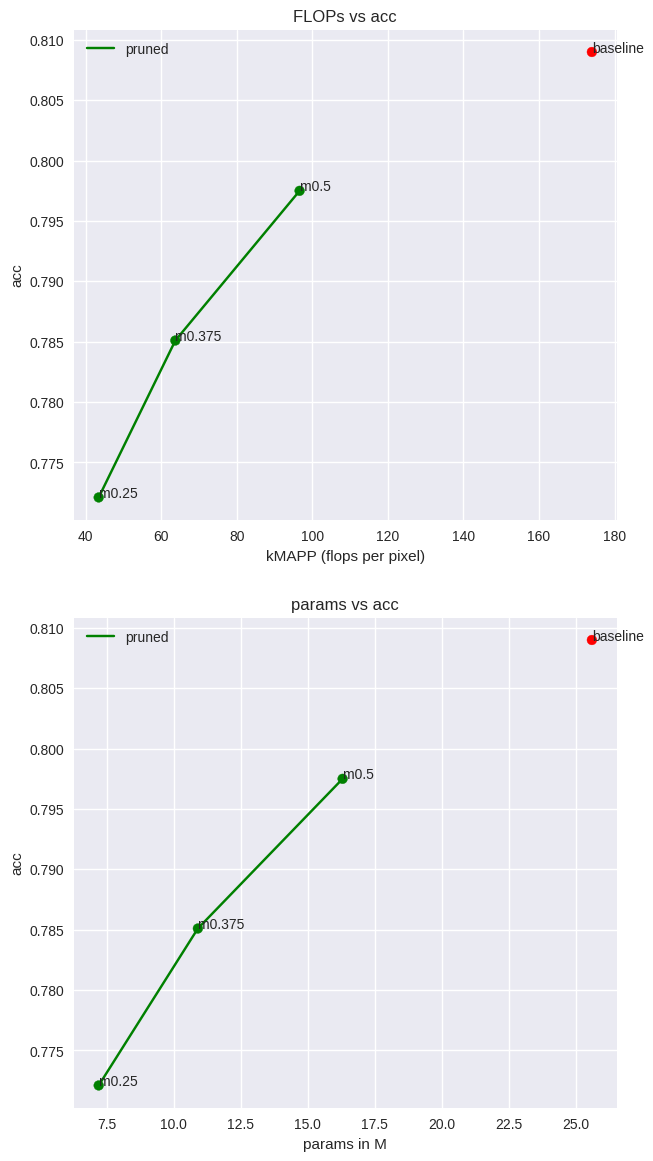

In [16]:
%matplotlib inline
fig, axes = plt.subplots(2, 1, figsize=(7,14))

FONTSIZE = 10
axes[0].scatter(kmapp, acc, c=color)
for i, txt in enumerate(name):
    axes[0].annotate(txt, (kmapp[i], acc[i]), fontsize=FONTSIZE)
axes[0].plot(kmapp[1:], acc[1:], color='green', label='pruned')
    
axes[0].set_xlabel('kMAPP (flops per pixel)')
axes[0].set_ylabel('acc')
axes[0].set_title('FLOPs vs acc')
axes[0].legend()

axes[1].scatter(params, acc, c=color)
for i, txt in enumerate(name):
    axes[1].annotate(txt, (params[i], acc[i]), fontsize=FONTSIZE)
axes[1].plot(params[1:], acc[1:], color='green', label='pruned')
    
#axes[0].set_ylim(0, 450)
#axes[0].set_xlim(0, 190)
axes[1].set_xlabel('params in M')
axes[1].set_ylabel('acc')
axes[1].set_title('params vs acc')
axes[1].legend()
    
plt.legend()
plt.show()

### deit small

In [2]:
data = [
    ('baseline', 0.8287, 184.0, 22.0, 'red'),
    ('m121', 0.8185, 121.0, 14.1, 'green'),
    ('m87', 0.8087, 87.2, 10.2, 'green'),
    ('m58', 0.7788, 58.3, 6.85, 'green'),
]

In [3]:
name = [e[0] for e in data]
acc = [e[1] for e in data]
kmapp = [e[2] for e in data]
params = [e[3] for e in data]
color = [e[4] for e in data]

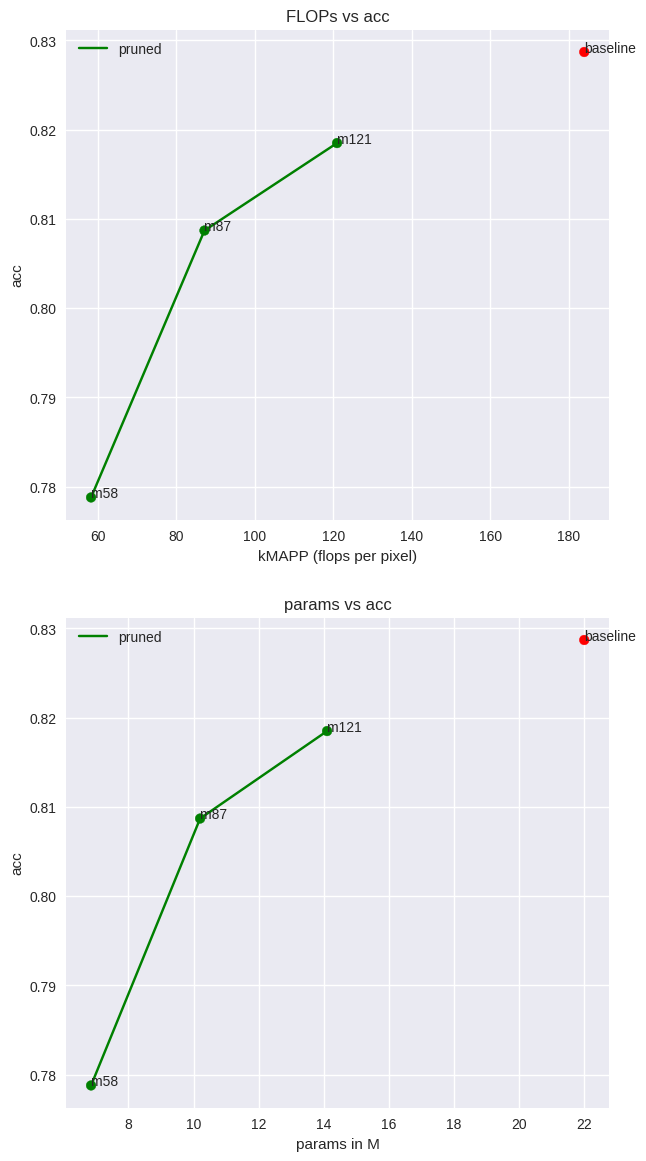

In [4]:
%matplotlib inline
fig, axes = plt.subplots(2, 1, figsize=(7,14))

FONTSIZE = 10
axes[0].scatter(kmapp, acc, c=color)
for i, txt in enumerate(name):
    axes[0].annotate(txt, (kmapp[i], acc[i]), fontsize=FONTSIZE)
axes[0].plot(kmapp[1:], acc[1:], color='green', label='pruned')
    
axes[0].set_xlabel('kMAPP (flops per pixel)')
axes[0].set_ylabel('acc')
axes[0].set_title('FLOPs vs acc')
axes[0].legend()

axes[1].scatter(params, acc, c=color)
for i, txt in enumerate(name):
    axes[1].annotate(txt, (params[i], acc[i]), fontsize=FONTSIZE)
axes[1].plot(params[1:], acc[1:], color='green', label='pruned')
    
#axes[0].set_ylim(0, 450)
#axes[0].set_xlim(0, 190)
axes[1].set_xlabel('params in M')
axes[1].set_ylabel('acc')
axes[1].set_title('params vs acc')
axes[1].legend()
    
plt.legend()
plt.show()

### FBNETV3G

In [5]:
data = [
    ('fbnetv3g', 0.8061, 42.75, 16.6, 'red'),
    ('fbnetv3d', 0.7856	, 20.73, 10.3, 'red'),
    ('fbnetv3b', 0.7812, 16.84, 8.6, 'red'),
    ('m16', 0.7742, 15.91, 7.8, 'green'),
    ('m22', 0.7920, 22.3, 10.5, 'green'),
    ('m28', 0.79686, 27.8, 11.6, 'green'),
    ('m32', 0.803, 32.15, 13.1, 'green'),
]

In [6]:
name = [e[0] for e in data]
acc = [e[1] for e in data]
kmapp = [e[2] for e in data]
params = [e[3] for e in data]
color = [e[4] for e in data]

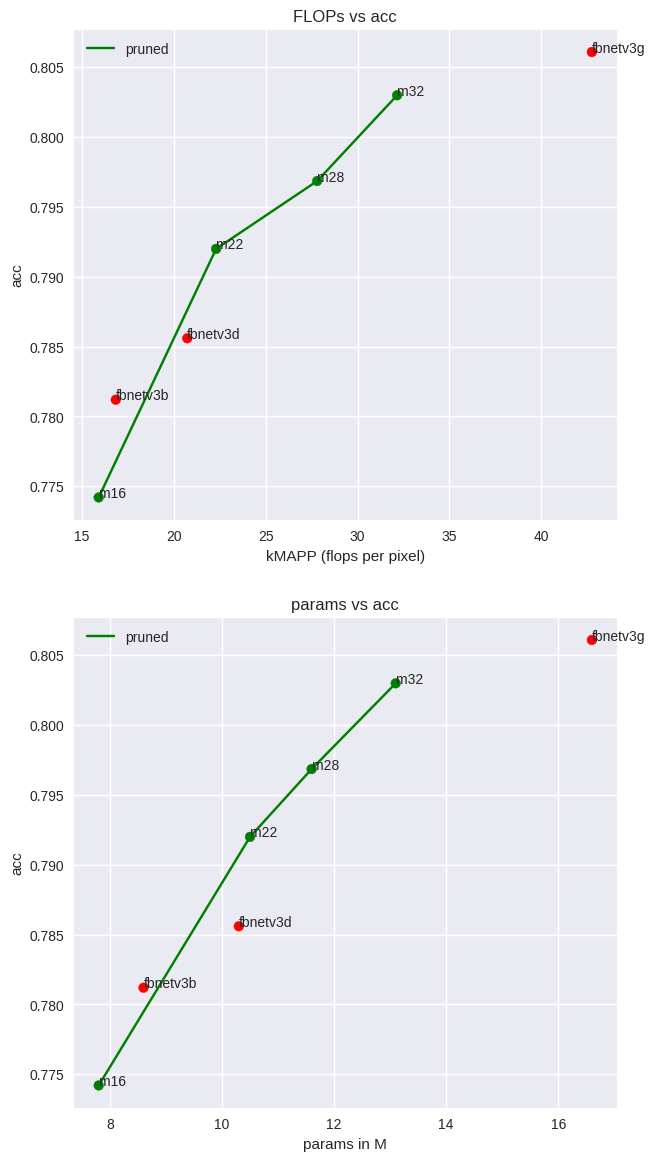

In [7]:
%matplotlib inline
fig, axes = plt.subplots(2, 1, figsize=(7,14))

FONTSIZE = 10
axes[0].scatter(kmapp, acc, c=color)
for i, txt in enumerate(name):
    axes[0].annotate(txt, (kmapp[i], acc[i]), fontsize=FONTSIZE)
axes[0].plot(kmapp[3:], acc[3:], color='green', label='pruned')
    
axes[0].set_xlabel('kMAPP (flops per pixel)')
axes[0].set_ylabel('acc')
axes[0].set_title('FLOPs vs acc')
axes[0].legend()

axes[1].scatter(params, acc, c=color)
for i, txt in enumerate(name):
    axes[1].annotate(txt, (params[i], acc[i]), fontsize=FONTSIZE)
axes[1].plot(params[3:], acc[3:], color='green', label='pruned')
    
#axes[0].set_ylim(0, 450)
#axes[0].set_xlim(0, 190)
axes[1].set_xlabel('params in M')
axes[1].set_ylabel('acc')
axes[1].set_title('params vs acc')
axes[1].legend()
    
plt.legend()
plt.show()

## efficientnetv2_b0

In [8]:
data = [
    ('baseline', 0.7869	, 29.0, 7.1, 'red'),
    ('m22', 0.7882, 22.1, 7.0, 'green'),
    ('m20', 0.7862, 20.5, 6.9, 'green'),
    ('m17', 0.7814, 17.7, 6.5, 'green'),
    ('m15', 0.7762, 15.7, 5.4, 'green'),
    ('m12', 0.7670, 11.7, 4.5, 'green'),
    ('m17_300', 0.7864, 17.4, 5.7, 'orange'),
    ('m15_300', 0.7769, 15.4, 5.0, 'orange'),
    ('m10_300', 0.7612, 10.3, 3.8, 'orange'),
]

In [9]:
name = [e[0] for e in data]
acc = [e[1] for e in data]
kmapp = [e[2] for e in data]
params = [e[3] for e in data]
color = [e[4] for e in data]

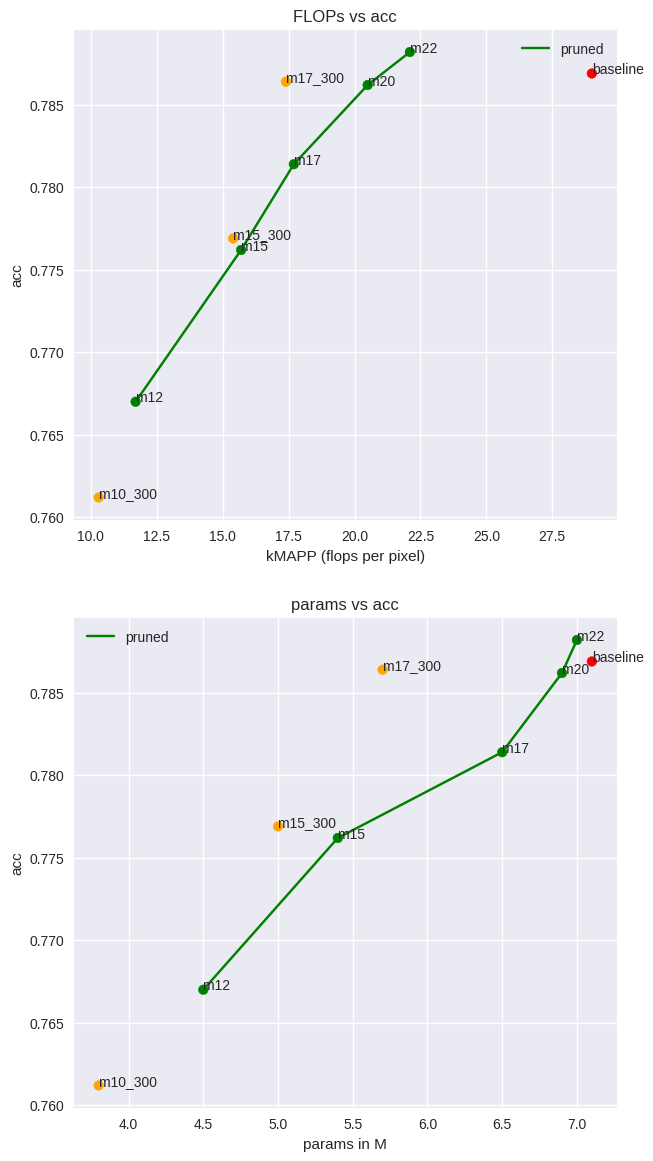

In [10]:
%matplotlib inline
fig, axes = plt.subplots(2, 1, figsize=(7,14))

FONTSIZE = 10
axes[0].scatter(kmapp, acc, c=color)
for i, txt in enumerate(name):
    axes[0].annotate(txt, (kmapp[i], acc[i]), fontsize=FONTSIZE)
axes[0].plot(kmapp[1:6], acc[1:6], color='green', label='pruned')
    
axes[0].set_xlabel('kMAPP (flops per pixel)')
axes[0].set_ylabel('acc')
axes[0].set_title('FLOPs vs acc')
axes[0].legend()

axes[1].scatter(params, acc, c=color)
for i, txt in enumerate(name):
    axes[1].annotate(txt, (params[i], acc[i]), fontsize=FONTSIZE)
axes[1].plot(params[1:6], acc[1:6], color='green', label='pruned')
    
#axes[0].set_ylim(0, 450)
#axes[0].set_xlim(0, 190)
axes[1].set_xlabel('params in M')
axes[1].set_ylabel('acc')
axes[1].set_title('params vs acc')
axes[1].legend()
    
plt.legend()
plt.show()

## 15.06.2023 weighted block pruning again

### mbnetv2_120d

The results are after fine-tuning for 100 epochs on `ImageNet` using `rexnetr_200.sw_in12k_ft_in1k` teacher.

In [3]:
data = [
    ('mbnetv2_120d', 27.63, 44.9, 0.773, 'red'),
    ('mbnetv2_110d', 17.8, 31.5, 0.7505, 'red'),
    ('mbnetv2_100d', 12.9, 25.0, 0.729, 'red'),
    ('lat5', 21.92, 36.8, 0.775, 'green'),
    ('lat10', 17.38, 29.6, 0.7641, 'green'),
    ('lat15', 12.43, 24.0, 0.7412, 'green'),
]

data_baseline = [
    ('mbnetv2_120d', 27.63, 44.9, 0.773, 'red'),
    ('mbnetv2_110d', 17.8, 31.5, 0.7505, 'red'),
    ('mbnetv2_100d', 12.9, 25.0, 0.729, 'red'),
]

data_latency = [
 ('lat5', 21.92, 36.8, 0.775, 'green'),
    ('lat10', 17.38, 29.6, 0.7641, 'green'),
    ('lat15', 12.43, 24.0, 0.7412, 'green'),
]

data_flops = [
 ('flops5', 22.53, 38.1, 0.773, 'orange'),
    ('flops10', 18.02, 31.2, 0.765, 'orange'),
    ('flops15', 13.4, 25.36, 0.738, 'orange'),
]

data_const = [
 ('const5', 24.27, 40.3, 0.773, 'blue'),
    ('const10', 19.2, 32.3, 0.765, 'blue'),
    ('const15', 13.6, 25.04, 0.7439, 'blue'),
]

In [4]:
name = [e[0] for e in data]
kmapp = [e[1] for e in data]
latency = [e[2] for e in data]
acc = [e[3] for e in data]
color = [e[4] for e in data]

name_base = [e[0] for e in data_baseline]
kmapp_base = [e[1] for e in data_baseline]
latency_base = [e[2] for e in data_baseline]
acc_base = [e[3] for e in data_baseline]
color_base = [e[4] for e in data_baseline]

name_lat = [e[0] for e in data_latency]
kmapp_lat = [e[1] for e in data_latency]
latency_lat = [e[2] for e in data_latency]
acc_lat = [e[3] for e in data_latency]
color_lat = [e[4] for e in data_latency]

name_flops = [e[0] for e in data_flops]
kmapp_flops = [e[1] for e in data_flops]
latency_flops = [e[2] for e in data_flops]
acc_flops = [e[3] for e in data_flops]
color_flops = [e[4] for e in data_flops]

name_const = [e[0] for e in data_const]
kmapp_const = [e[1] for e in data_const]
latency_const = [e[2] for e in data_const]
acc_const = [e[3] for e in data_const]
color_const = [e[4] for e in data_const]

FONTSIZE = 10

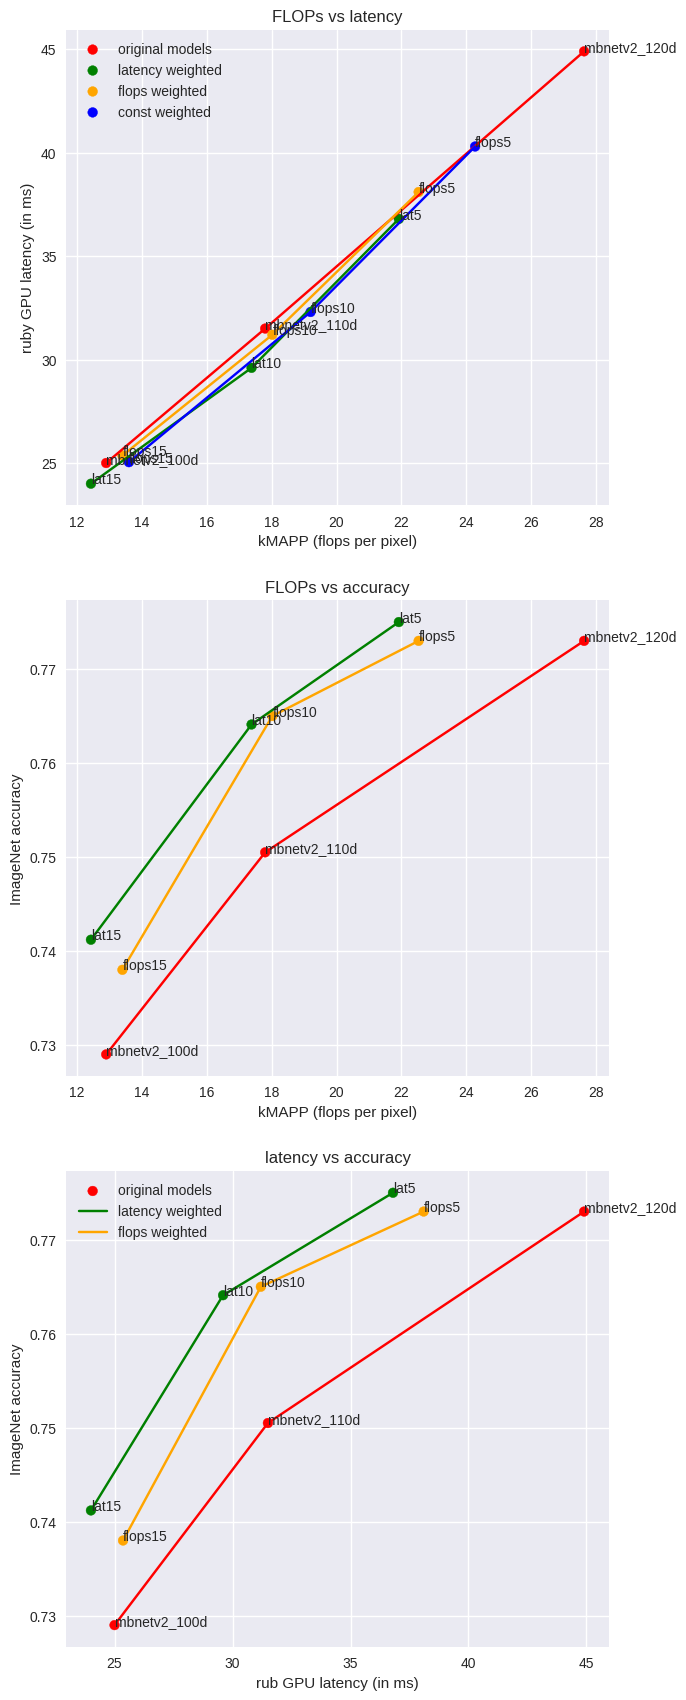

In [5]:
%matplotlib inline
fig, axes = plt.subplots(3, 1, figsize=(7,21))

# baseline
axes[0].scatter(kmapp_base, latency_base, c=color_base, label='original models')
axes[0].plot(kmapp_base, latency_base, c=color_base[0])
for i, txt in enumerate(name_base):
    axes[0].annotate(txt, (kmapp_base[i], latency_base[i]), fontsize=FONTSIZE)

# latency
axes[0].scatter(kmapp_lat, latency_lat, c=color_lat, label='latency weighted')
axes[0].plot(kmapp_lat, latency_lat, c=color_lat[0])
for i, txt in enumerate(name_lat):
    axes[0].annotate(txt, (kmapp_lat[i], latency_lat[i]), fontsize=FONTSIZE)
    
# flops
axes[0].scatter(kmapp_flops, latency_flops, c=color_flops, label='flops weighted')
axes[0].plot(kmapp_flops, latency_flops, c=color_flops[0])
for i, txt in enumerate(name_flops):
    axes[0].annotate(txt, (kmapp_flops[i], latency_flops[i]), fontsize=FONTSIZE)
    
    
axes[0].scatter(kmapp_const, latency_const, c=color_const, label='const weighted')
axes[0].plot(kmapp_const, latency_const, c=color_const[0])
for i, txt in enumerate(name_flops):
    axes[0].annotate(txt, (kmapp_const[i], latency_const[i]), fontsize=FONTSIZE)


axes[0].set_xlabel('kMAPP (flops per pixel)')
axes[0].set_ylabel('ruby GPU latency (in ms)')
axes[0].set_title('FLOPs vs latency')
axes[0].legend(loc="upper left")

#####
    
axes[1].scatter(kmapp_base, acc_base, c=color_base, label='original models')
axes[1].plot(kmapp_base, acc_base, c=color_base[0])
for i, txt in enumerate(name_base):
    axes[1].annotate(txt, (kmapp_base[i], acc_base[i]), fontsize=FONTSIZE)
    
axes[1].scatter(kmapp_lat, acc_lat, c=color_lat, label='latency weighted')
axes[1].plot(kmapp_lat, acc_lat, c=color_lat[0])
for i, txt in enumerate(name_lat):
    axes[1].annotate(txt, (kmapp_lat[i], acc_lat[i]), fontsize=FONTSIZE)
    
axes[1].scatter(kmapp_flops, acc_flops, c=color_flops, label='flops weighted')
axes[1].plot(kmapp_flops, acc_flops, c=color_flops[0])
for i, txt in enumerate(name_flops):
    axes[1].annotate(txt, (kmapp_flops[i], acc_flops[i]), fontsize=FONTSIZE)

axes[1].set_xlabel('kMAPP (flops per pixel)')
axes[1].set_ylabel('ImageNet accuracy')
axes[1].set_title('FLOPs vs accuracy')

#####


axes[2].scatter(latency_base, acc_base, c=color_base, label='original models')
axes[2].plot(latency_base, acc_base, c=color_base[0])
for i, txt in enumerate(name_base):
    axes[2].annotate(txt, (latency_base[i], acc_base[i]), fontsize=FONTSIZE)
    
axes[2].scatter(latency_lat, acc_lat, c=color_lat)
axes[2].plot(latency_lat, acc_lat, c=color_lat[0], label='latency weighted')
for i, txt in enumerate(name_lat):
    axes[2].annotate(txt, (latency_lat[i], acc_lat[i]), fontsize=FONTSIZE)
    
axes[2].scatter(latency_flops, acc_flops, c=color_flops)
axes[2].plot(latency_flops, acc_flops, c=color_flops[0], label='flops weighted')
for i, txt in enumerate(name_flops):
    axes[2].annotate(txt, (latency_flops[i], acc_flops[i]), fontsize=FONTSIZE)
    
axes[2].set_xlabel('rub GPU latency (in ms)')
axes[2].set_ylabel('ImageNet accuracy')
axes[2].set_title('latency vs accuracy')

# axes.scatter(kmapp_kmapp, cpu_kmapp)
# for i, txt in enumerate(labels_kmapp):
#     axes.annotate(txt, (kmapp_kmapp[i], cpu_kmapp[i]), fontsize=FONTSIZE)
    
# axes.set_ylim(4, 13)
# axes.set_xlim(5, 12)
# axes.set_xlabel('kMAPP (flops per pixel)')
# axes.set_ylabel('T1 smartphone CPU latency (in ms)')
# axes.set_title('FLOPs vs latency')
plt.legend()
plt.show()

## 22.05.2023 weighted vs non-weighted block pruning

In [6]:
data = [
    ('baseline', 25.6, 320.0, 0.97718, 'red'),
    ('b5', 20.2, 270.0, 0.9784, 'green'),
    ('b9', 12.56, 152.8, 0.9737, 'green'),
    ('b13', 7.6, 88.5, 0.9396, 'green'),
    ('wb5', 17.3, 216.1, 0.9807, 'orange'),
    ('wb9', 12.5, 149.0, 0.9760, 'orange'),
    ('wb13', 7.6, 88.6, 0.940, 'orange'),
]

In [7]:
name = [e[0] for e in data]
kmapp = [e[1] for e in data]
latency = [e[2] for e in data]
iou = [e[3] for e in data]
color = [e[4] for e in data]

FONTSIZE = 10

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


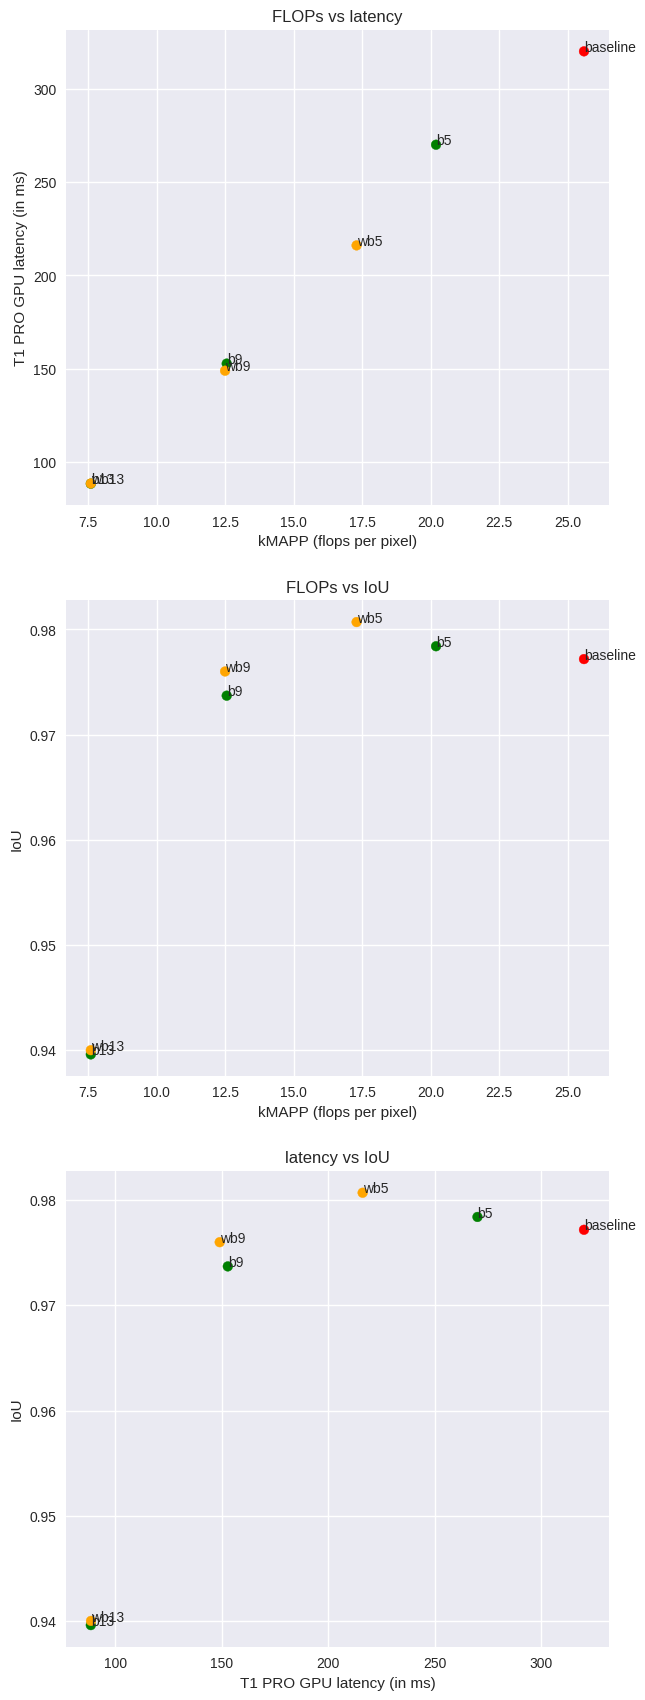

In [8]:
%matplotlib inline
fig, axes = plt.subplots(3, 1, figsize=(7,21))

axes[0].scatter(kmapp, latency, c=color)
for i, txt in enumerate(name):
    axes[0].annotate(txt, (kmapp[i], latency[i]), fontsize=FONTSIZE)
    
#axes[0].set_ylim(0, 450)
#axes[0].set_xlim(0, 190)
axes[0].set_xlabel('kMAPP (flops per pixel)')
axes[0].set_ylabel('T1 PRO GPU latency (in ms)')
axes[0].set_title('FLOPs vs latency')
    
axes[1].scatter(kmapp, iou, c=color)
for i, txt in enumerate(name):
    axes[1].annotate(txt, (kmapp[i], iou[i]), fontsize=FONTSIZE)
    
# axes[0].set_ylim(0, 450)
# axes[1].set_xlim(0, 190)
axes[1].set_xlabel('kMAPP (flops per pixel)')
axes[1].set_ylabel('IoU')
axes[1].set_title('FLOPs vs IoU')


axes[2].scatter(latency, iou, c=color)
for i, txt in enumerate(name):
    axes[2].annotate(txt, (latency[i], iou[i]), fontsize=FONTSIZE)
    
# axes[0].set_ylim(150, 450)
# axes[2].set_xlim(0, 450)
axes[2].set_xlabel('T1 PRO GPU latency (in ms)')
axes[2].set_ylabel('IoU')
axes[2].set_title('latency vs IoU')

# axes.scatter(kmapp_kmapp, cpu_kmapp)
# for i, txt in enumerate(labels_kmapp):
#     axes.annotate(txt, (kmapp_kmapp[i], cpu_kmapp[i]), fontsize=FONTSIZE)
    
# axes.set_ylim(4, 13)
# axes.set_xlim(5, 12)
# axes.set_xlabel('kMAPP (flops per pixel)')
# axes.set_ylabel('T1 smartphone CPU latency (in ms)')
# axes.set_title('FLOPs vs latency')
plt.legend()
plt.show()

## 25.04 `FBNETV3G` block vs channel pruning

In [6]:
data = [
    ('baseline', 44.5, 48.8, 0.7970, 'red'),
    ('b10', 34.6, 41.8, 0.7980, 'green'),
    ('b15', 29.5, 36.0, 0.7950, 'green'),
    ('b20', 24.4, 33.6, 0.7900, 'green'),
    ('b25', 17.7, 25.4, 0.7801, 'green'),
    #('18/24', 51, 154, 0.675),
    ('p15', 15.5, 19.06, 0.773, 'orange'),
    ('p20', 21.8, 34.1, 0.7920, 'orange'),
    ('p25', 27.3, 40.0, 0.796, 'orange'),
    ('p30', 31.6, 43.7, 0.8000, 'orange'),
]

In [4]:
name = [e[0] for e in data]
kmapp = [e[1] for e in data]%matplotlib inline
fig, axes = plt.subplots(3, 1, figsize=(7,21))

axes[0].scatter(kmapp, latency, c=color)
for i, txt in enumerate(name):
    axes[0].annotate(txt, (kmapp[i], latency[i]), fontsize=FONTSIZE)
    
#axes[0].set_ylim(0, 450)
#axes[0].set_xlim(0, 190)
axes[0].set_xlabel('kMAPP (flops per pixel)')
axes[0].set_ylabel('ruby GPU latency (in ms)')
axes[0].set_title('FLOPs vs latency')
    
axes[1].scatter(kmapp, acc, c=color)
for i, txt in enumerate(name):
    axes[1].annotate(txt, (kmapp[i], acc[i]), fontsize=FONTSIZE)
    
# axes[0].set_ylim(0, 450)
# axes[1].set_xlim(0, 190)
axes[1].set_xlabel('kMAPP (flops per pixel)')
axes[1].set_ylabel('ImageNet accuracy')
axes[1].set_title('FLOPs vs accuracy')


axes[2].scatter(latency, acc, c=color)
for i, txt in enumerate(name):
    axes[2].annotate(txt, (latency[i], acc[i]), fontsize=FONTSIZE)
    
# axes[0].set_ylim(150, 450)
# axes[2].set_xlim(0, 450)
axes[2].set_xlabel('rub GPU latency (in ms)')
axes[2].set_ylabel('ImageNet accuracy')
axes[2].set_title('latency vs accuracy')

# axes.scatter(kmapp_kmapp, cpu_kmapp)
# for i, txt in enumerate(labels_kmapp):
#     axes.annotate(txt, (kmapp_kmapp[i], cpu_kmapp[i]), fontsize=FONTSIZE)
    
# axes.set_ylim(4, 13)
# axes.set_xlim(5, 12)
# axes.set_xlabel('kMAPP (flops per pixel)')
# axes.set_ylabel('T1 smartphone CPU latency (in ms)')
# axes.set_title('FLOPs vs latency')
plt.legend()
plt.show()
latency = [e[2] for e in data]
acc = [e[3] for e in data]
color = [e[4] for e in data]

FONTSIZE = 10

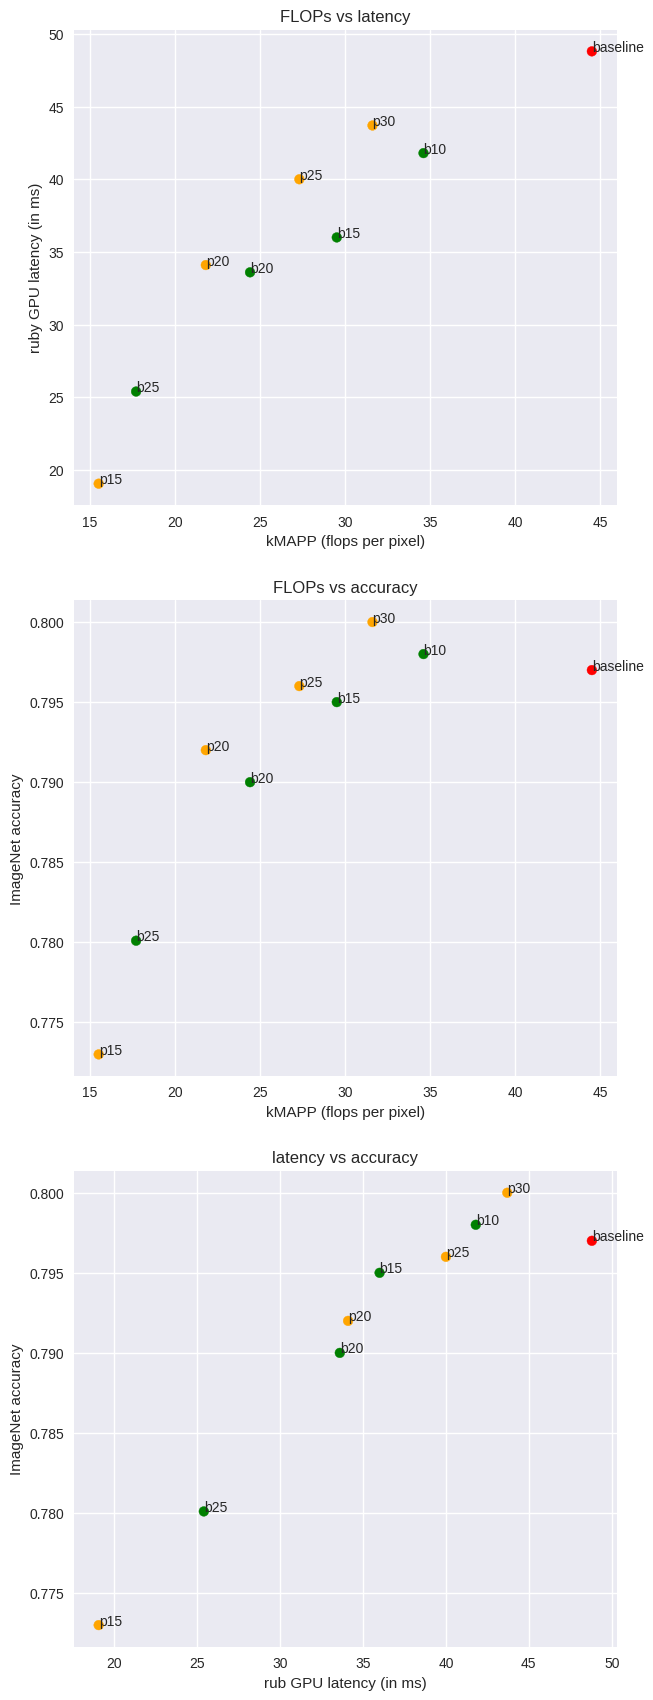

In [5]:
%matplotlib inline
fig, axes = plt.subplots(3, 1, figsize=(7,21))

axes[0].scatter(kmapp, latency, c=color)
for i, txt in enumerate(name):
    axes[0].annotate(txt, (kmapp[i], latency[i]), fontsize=FONTSIZE)
    
#axes[0].set_ylim(0, 450)
#axes[0].set_xlim(0, 190)
axes[0].set_xlabel('kMAPP (flops per pixel)')
axes[0].set_ylabel('ruby GPU latency (in ms)')
axes[0].set_title('FLOPs vs latency')
    
axes[1].scatter(kmapp, acc, c=color)
for i, txt in enumerate(name):
    axes[1].annotate(txt, (kmapp[i], acc[i]), fontsize=FONTSIZE)
    
# axes[0].set_ylim(0, 450)
# axes[1].set_xlim(0, 190)
axes[1].set_xlabel('kMAPP (flops per pixel)')
axes[1].set_ylabel('ImageNet accuracy')
axes[1].set_title('FLOPs vs accuracy')


axes[2].scatter(latency, acc, c=color)
for i, txt in enumerate(name):
    axes[2].annotate(txt, (latency[i], acc[i]), fontsize=FONTSIZE)
    
# axes[0].set_ylim(150, 450)
# axes[2].set_xlim(0, 450)
axes[2].set_xlabel('rub GPU latency (in ms)')
axes[2].set_ylabel('ImageNet accuracy')
axes[2].set_title('latency vs accuracy')

# axes.scatter(kmapp_kmapp, cpu_kmapp)
# for i, txt in enumerate(labels_kmapp):
#     axes.annotate(txt, (kmapp_kmapp[i], cpu_kmapp[i]), fontsize=FONTSIZE)
    
# axes.set_ylim(4, 13)
# axes.set_xlim(5, 12)
# axes.set_xlabel('kMAPP (flops per pixel)')
# axes.set_ylabel('T1 smartphone CPU latency (in ms)')
# axes.set_title('FLOPs vs latency')
plt.legend()
plt.show()

## 29.03.2023 `DEIT3_small` compression

In [6]:
data = [
    ('baseline', 184, 439, 0.828, 'red'),
    ('50/84-head', 135, 329, 0.82, 'green'),
    ('60/84-head', 125, 304, 0.791, 'green'),
    ('8/24', 127, 313, 0.82, 'orange'),
    ('14/24', 81, 221, 0.7825, 'orange'),
    #('18/24', 51, 154, 0.675),
    ('p125', 125, 317, 0.8185, 'blue'),
    ('p80', 80, 251, 0.8085, 'blue'),
    ('p50', 50, 191, 0.7788, 'blue'),
]

In [7]:
data_qk_dlrl = [
    ('qk_0.05_dlrl_0.0', 179.0, 0.0, 0.8284, 'yellow'),
    ('qk_0.1_dlrl_0.0', 160.0, 0.0, 0.8229, 'yellow'),
    ('qk_0.2_dlrl_0.0', 157.3, 0.0, 0.8224, 'yellow'),
    ('qk_0.0_dlrl_0.05', 173.3, 0.0, 0.8248, 'yellow'),
    ('qk_0.0_dlrl_0.1', 168.6, 0.0, 0.82334, 'yellow'),
    ('qk_0.0_dlrl_0.2', 145.5, 0.0, 0.8186, 'yellow'),
    ('qk_0.2_dlrl_0.1', 142.0, 0.0, 0.8192, 'yellow'),
    ('qk_0.3_dlrl_0.3', 118.7, 0.0, 0.8189, 'yellow'),
    ('qk_0.3_dlrl_0.3*', 97.5, 0.0, 0.8106, 'yellow'),
    
]

In [8]:
data = data + data_qk_dlrl

In [9]:
name = [e[0] for e in data]
kmapp = [e[1] for e in data]
latency = [e[2] for e in data]
acc = [e[3] for e in data]
color = [e[4] for e in data]

FONTSIZE = 10

Text(0.5, 1.0, 'FLOPs vs accuracy')

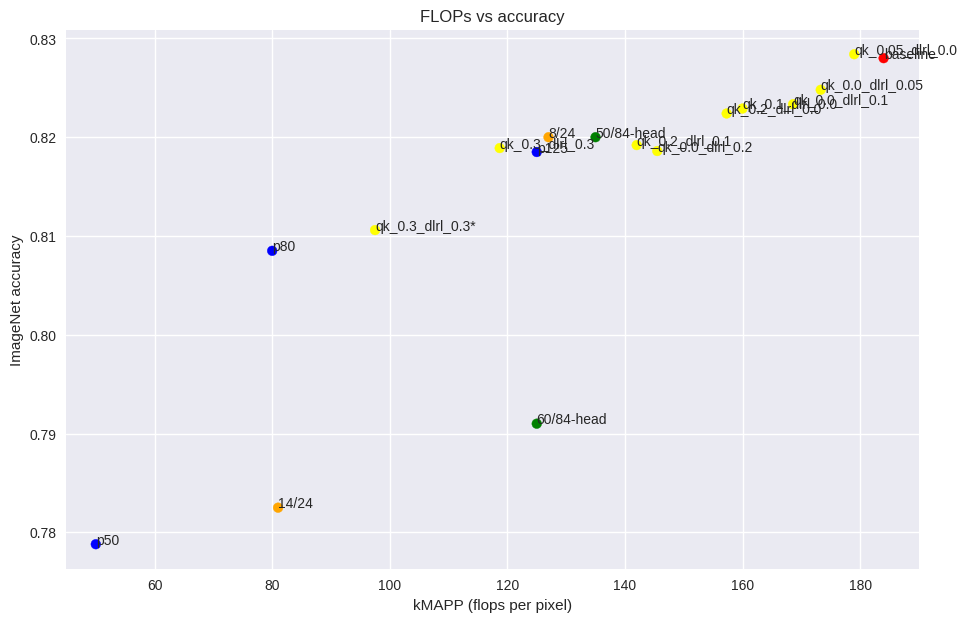

In [10]:
%matplotlib inline
fig, axes = plt.subplots(1, 1, figsize=(11,7))
    
axes.scatter(kmapp, acc, c=color)
for i, txt in enumerate(name):
    axes.annotate(txt, (kmapp[i], acc[i]), fontsize=FONTSIZE)
    
#axes.set_ylim(0, 450)
axes.set_xlim(45, 190)
axes.set_xlabel('kMAPP (flops per pixel)')
axes.set_ylabel('ImageNet accuracy')
axes.set_title('FLOPs vs accuracy')

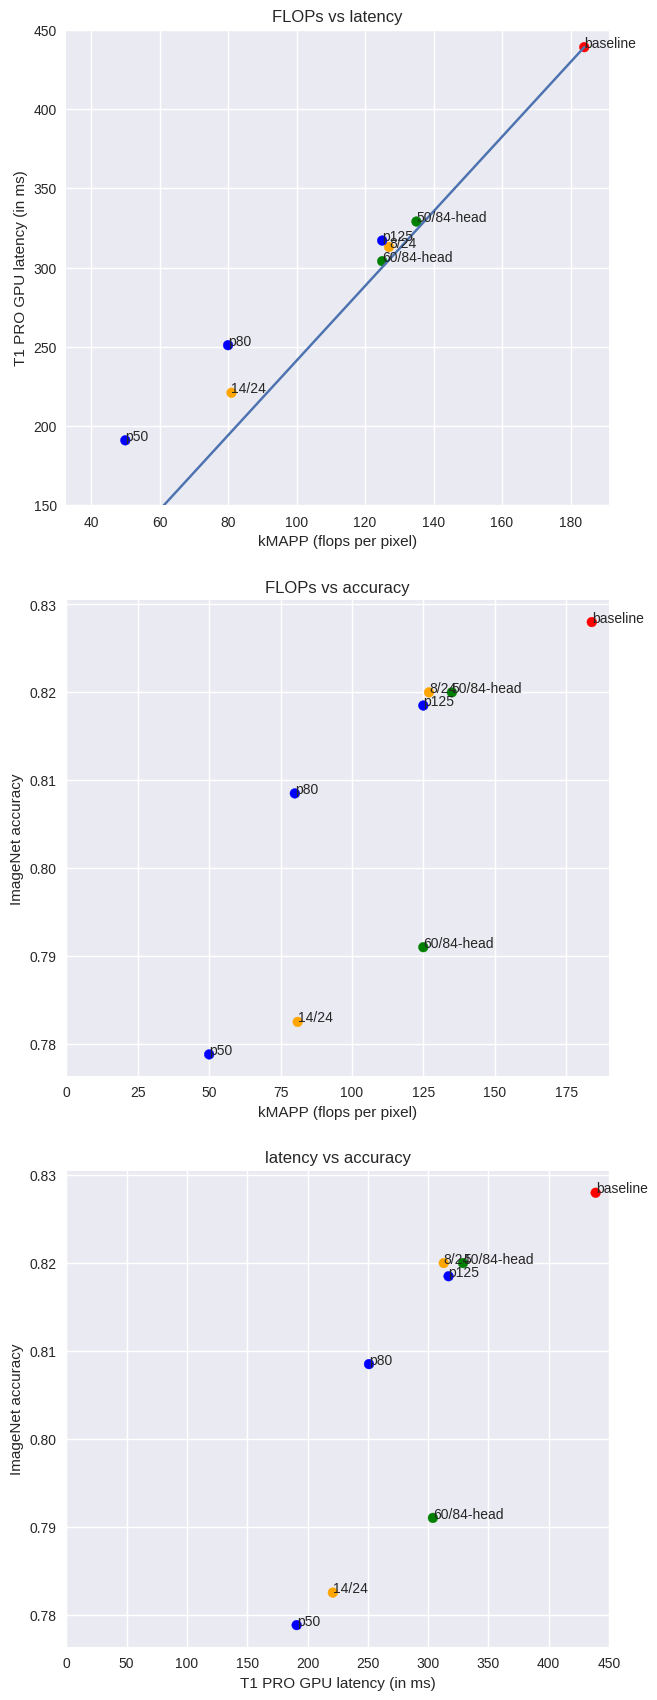

In [11]:
%matplotlib inline
fig, axes = plt.subplots(3, 1, figsize=(7,21))

axes[0].scatter(kmapp, latency, c=color)
axes[0].plot(np.linspace(40, 184, 100), np.linspace(100, 439, 100))
for i, txt in enumerate(name):
    axes[0].annotate(txt, (kmapp[i], latency[i]), fontsize=FONTSIZE)
    
#axes[0].set_ylim(0, 450)
#axes[0].set_xlim(0, 190)
axes[0].set_xlabel('kMAPP (flops per pixel)')
axes[0].set_ylabel('T1 PRO GPU latency (in ms)')
axes[0].set_title('FLOPs vs latency')
    
axes[1].scatter(kmapp, acc, c=color)
for i, txt in enumerate(name):
    axes[1].annotate(txt, (kmapp[i], acc[i]), fontsize=FONTSIZE)
    
# axes[0].set_ylim(0, 450)
axes[1].set_xlim(0, 190)
axes[1].set_xlabel('kMAPP (flops per pixel)')
axes[1].set_ylabel('ImageNet accuracy')
axes[1].set_title('FLOPs vs accuracy')


axes[2].scatter(latency, acc, c=color)
for i, txt in enumerate(name):
    axes[2].annotate(txt, (latency[i], acc[i]), fontsize=FONTSIZE)
    
axes[0].set_ylim(150, 450)
axes[2].set_xlim(0, 450)
axes[2].set_xlabel('T1 PRO GPU latency (in ms)')
axes[2].set_ylabel('ImageNet accuracy')
axes[2].set_title('latency vs accuracy')

# axes.scatter(kmapp_kmapp, cpu_kmapp)
# for i, txt in enumerate(labels_kmapp):
#     axes.annotate(txt, (kmapp_kmapp[i], cpu_kmapp[i]), fontsize=FONTSIZE)
    
# axes.set_ylim(4, 13)
# axes.set_xlim(5, 12)
# axes.set_xlabel('kMAPP (flops per pixel)')
# axes.set_ylabel('T1 smartphone CPU latency (in ms)')
# axes.set_title('FLOPs vs latency')
plt.legend()
plt.show()

## 19.02.2023 `MTK6833 GPU`

In [25]:
data = [
    (28.2, 16.7, 'FBNetV3B'),
    (15.2, 10.2, 'mbnet_v2_merger'),
    #(65.6, 163.0, 'resnet_50_torch_r224'),
    (37.0, 54.4, 'repvgg_A0_cls'),
    (16.3, 8.9, 'mbnet_v3_large_100_torch_miil'),
    (19.0, 14.1, 'enet_v2_b0_quant_friendly_m15_merger'),
    (37.2, 78.2, 'mobile_one_conv'),
    (13.4, 11.0, 'mobile_one_s0'),
    (27.8, 33.0, 'mobile_one_s1'),
]

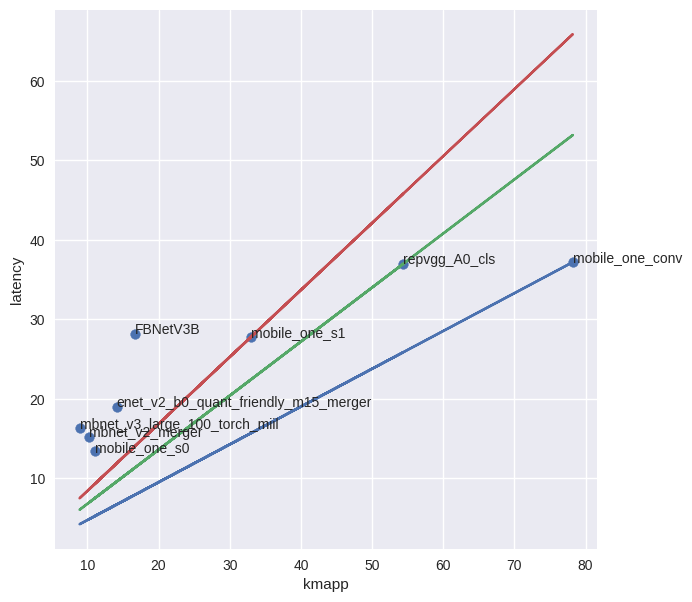

In [5]:
%matplotlib inline
fig, axes = plt.subplots(1, 1, figsize=(7, 7))
kmapp = [e[1] for e in data]
latency = [e[0] for e in data]
labels = [e[2] for e in data]
axes.scatter(kmapp, latency)
ratio = [y/x for x, y in zip(kmapp, latency)]
ratio = np.sort(ratio)
min_ratio = min(ratio)
for r in ratio[:3]:
    axes.plot(kmapp, [e * r for e in kmapp])
axes.set_xlabel('kmapp')
axes.set_ylabel('latency')
#axes.set_ylim(0, 45)
#axes.set_xlim(0, 85)
for i, txt in enumerate(labels):
    axes.annotate(txt, (kmapp[i], latency[i]), fontsize=10)

In [40]:
ratio

[1.688622754491018,
 1.4901960784313726,
 0.6801470588235294,
 1.8314606741573034,
 1.3475177304964538,
 0.47570332480818417,
 1.2181818181818183,
 0.8424242424242424]

In [47]:
step = tf.Variable(0, dtype=tf.int64)

In [48]:
lr_schedule = tf.keras.optimizers.schedules.CosineDecay(
                    0.01,
                    1000,
                )

In [50]:
learning_rate = lr_schedule(step)
learning_rate

<tf.Tensor: shape=(), dtype=float32, numpy=0.01>

In [61]:
optimizer = tf.keras.optimizers.Adam(
                learning_rate=0.001,
                weight_decay=0.0001,
            )

In [62]:
lr_schedule(step)

<tf.Tensor: shape=(), dtype=float32, numpy=0.009997532>

In [63]:
optimizer.learning_rate 

<tf.Variable 'learning_rate:0' shape=() dtype=float32, numpy=0.001>

In [57]:
step.assign(10)

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=10>

In [58]:
optimizer.learning_rate 

<tf.Variable 'current_learning_rate:0' shape=() dtype=float32, numpy=0.01>

## 30.12 `kmapp` per node

In [7]:
THRESHOLD = 0.1
INPUT_SHAPE = (1, 224, 224, 3)

In [37]:
MODEL_PATH = '/nas/projects/auto-ml/node_api_research_experiments/S31E1/FBNetV3G'

In [38]:
model = ndr.model_tools.ModelCellWrapper.load_from_path(MODEL_PATH)
cell = model.cell.flatten()

INFO:node_api_research.model_tools.model_cell_wrapper:Setting model global step value: 0


In [39]:
data = []

In [40]:

model.cell.predict()
full_mulltiadds = ndr.utils.build_full_multiadds_list(
    cell=cell,
    input_shape_without_batch=INPUT_SHAPE[1:],
)
for icn, flops in zip(cell.inner_cell_nodes, full_mulltiadds):
    kmapp_per_icn = flops / float(INPUT_SHAPE[1] * INPUT_SHAPE[1] * 1e3)
    if kmapp_per_icn > THRESHOLD:
        data.append((str(icn), kmapp_per_icn))

/opt/devine/node-api/node_api/reshaping/reshape.py:439: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  tf.compat.v1.layers.flatten(


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


/usr/local/lib/python3.8/dist-packages/tensorflow/python/autograph/impl/api.py:458: UserWarning: `tf.layers.flatten` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Flatten` instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/keras/legacy_tf_layers/base.py:627: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  self.updates, tf.compat.v1.GraphKeys.UPDATE_OPS


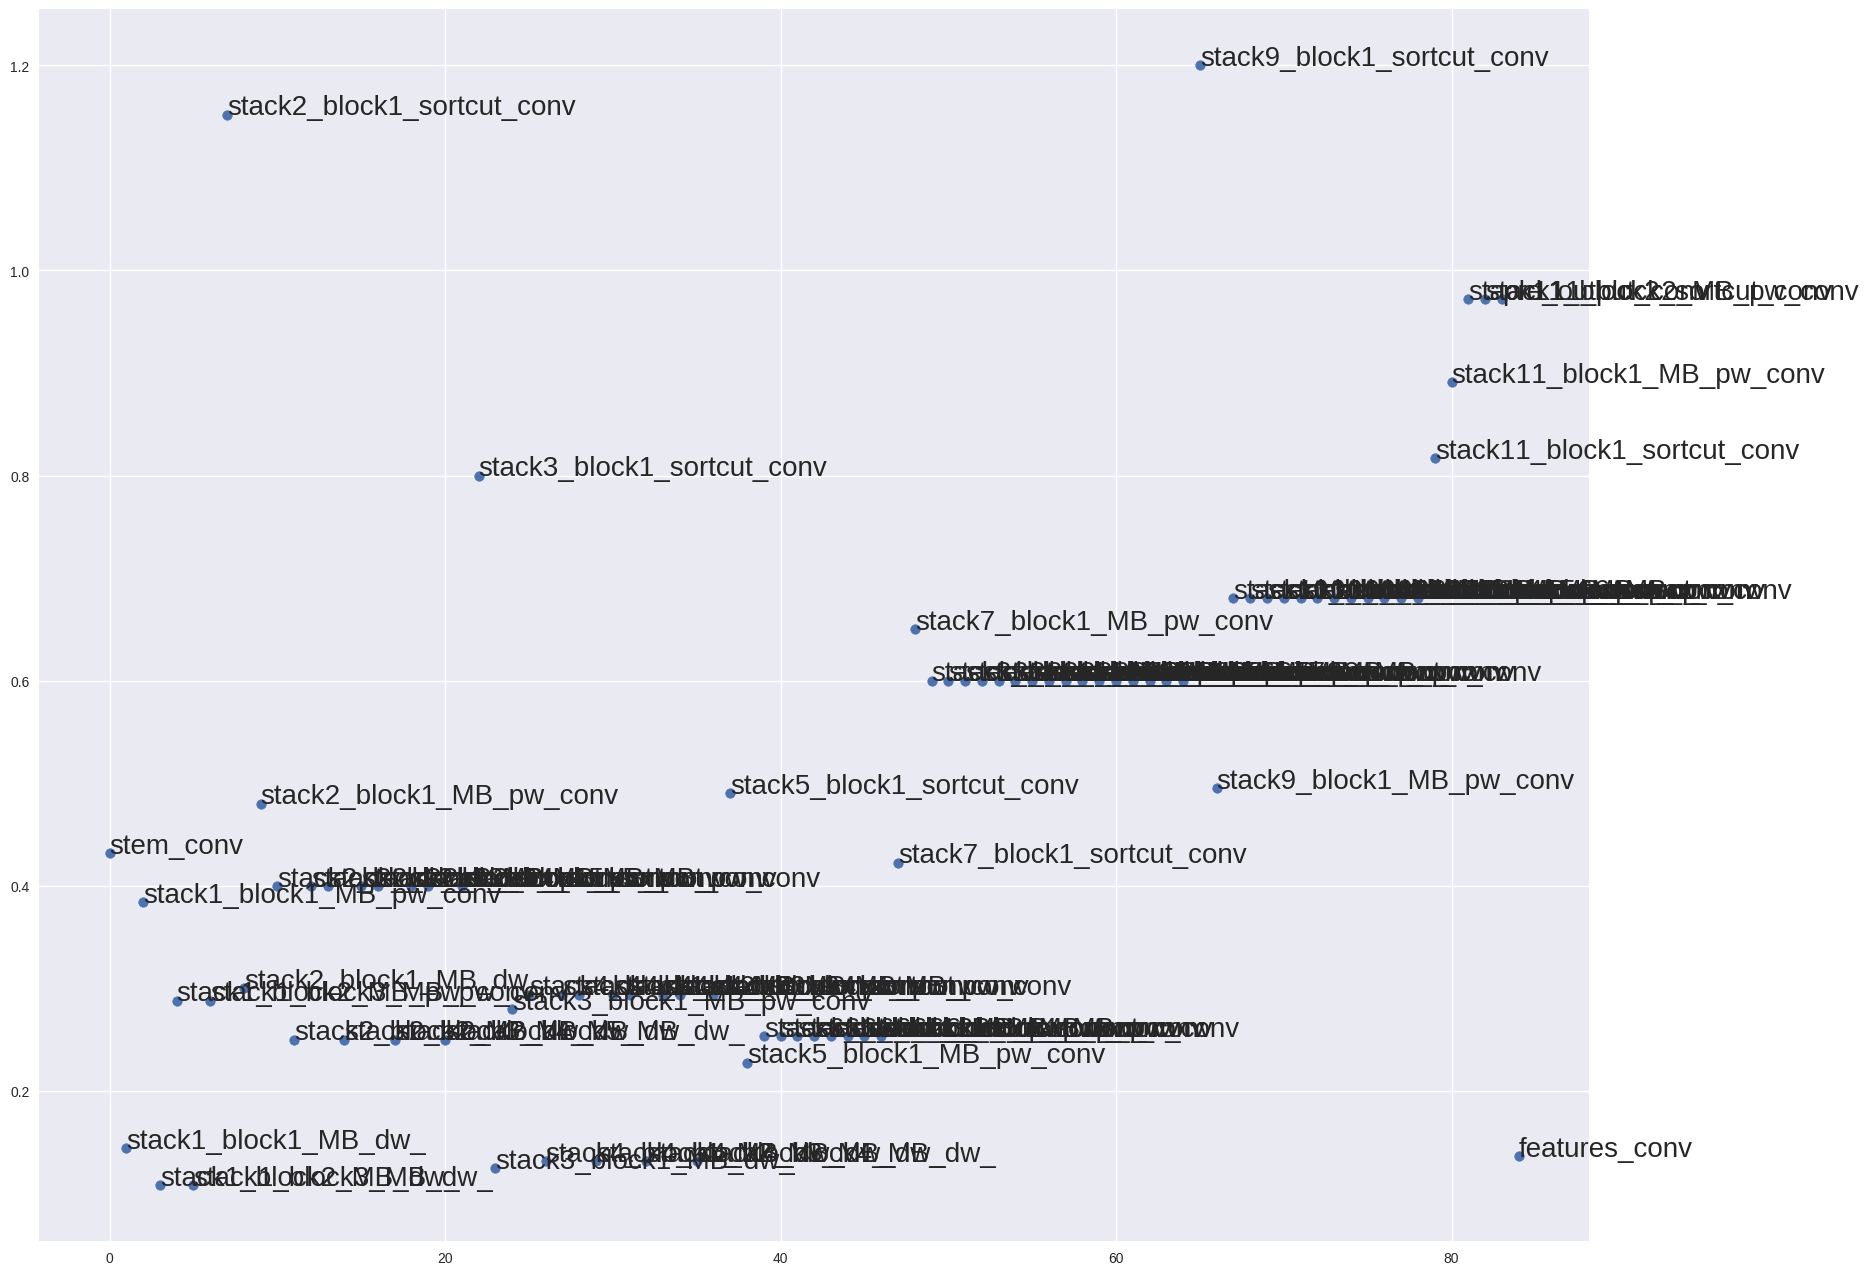

In [46]:
%matplotlib inline
fig, axes = plt.subplots(1, 1, figsize=(20, 16))
x = range(len(data))
labels = [e[0] for e in data]
kmapp = [e[1].numpy() for e in data]

axes.scatter(x, kmapp)
for i, txt in enumerate(labels):
    axes.annotate(txt, (x[i], kmapp[i]), fontsize=20)

### 30.11.2022

In [3]:
FONTSIZE=12

### T1 CPU

In [4]:
# kmapp # acc # T1 cpu # 
data = {
    'MobileNetV2': [11, 71.5, 14.4],
    'MobileNetV3': [9, 75.7, 12.1],
    'MobileNetV3-0.75': [6.41, 73.7, 9.77],
    #'MobileNetV3-minimalistic': [8.6, 72.6, 9.8],
}

data_cpu = {
    'CPU10': [8.5, 75.3, 9.4],
    'CPU8': [6.9, 73.45, 8.0],
    'CPU6': [5.4, 71.16, 6.0],
}

data_kmapp = {
    'm8': [8, 77.0, 11.6],
    'm7': [7, 75.7, 10.7],
    'm6': [6, 74.1, 9.5],
}

In [5]:
labels = list(data.keys())
kmapp = [data[e][0] for e in labels]
acc = [data[e][1] for e in labels]
cpu = [data[e][2] for e in labels]

In [6]:
labels_cpu = list(data_cpu.keys())
kmapp_cpu = [data_cpu[e][0] for e in labels_cpu]
acc_cpu = [data_cpu[e][1] for e in labels_cpu]
cpu_cpu = [data_cpu[e][2] for e in labels_cpu]

labels_kmapp = list(data_kmapp.keys())
kmapp_kmapp = [data_kmapp[e][0] for e in labels_kmapp]
acc_kmapp = [data_kmapp[e][1] for e in labels_kmapp]
cpu_kmapp = [data_kmapp[e][2] for e in labels_kmapp]

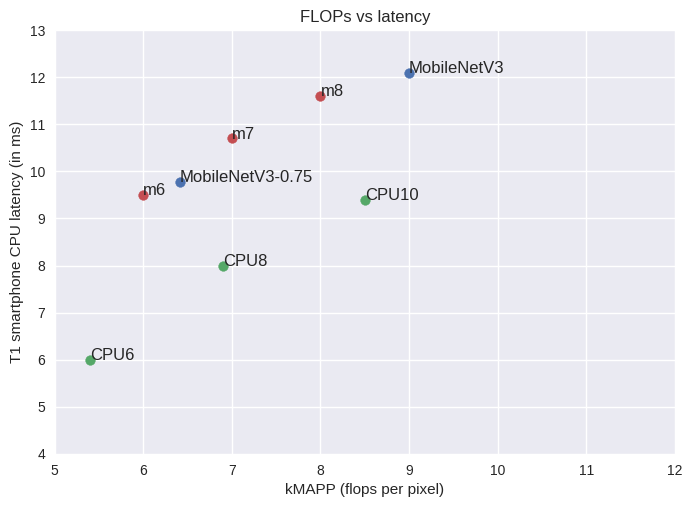

In [7]:
%matplotlib inline
fig, axes = plt.subplots(1, 1)

axes.scatter(kmapp, cpu)
for i, txt in enumerate(labels):
    axes.annotate(txt, (kmapp[i], cpu[i]), fontsize=FONTSIZE)
    
axes.scatter(kmapp_cpu, cpu_cpu)
for i, txt in enumerate(labels_cpu):
    axes.annotate(txt, (kmapp_cpu[i], cpu_cpu[i]), fontsize=FONTSIZE)
    
axes.scatter(kmapp_kmapp, cpu_kmapp)
for i, txt in enumerate(labels_kmapp):
    axes.annotate(txt, (kmapp_kmapp[i], cpu_kmapp[i]), fontsize=FONTSIZE)
    
axes.set_ylim(4, 13)
axes.set_xlim(5, 12)
axes.set_xlabel('kMAPP (flops per pixel)')
axes.set_ylabel('T1 smartphone CPU latency (in ms)')
axes.set_title('FLOPs vs latency')
plt.legend()
plt.show()

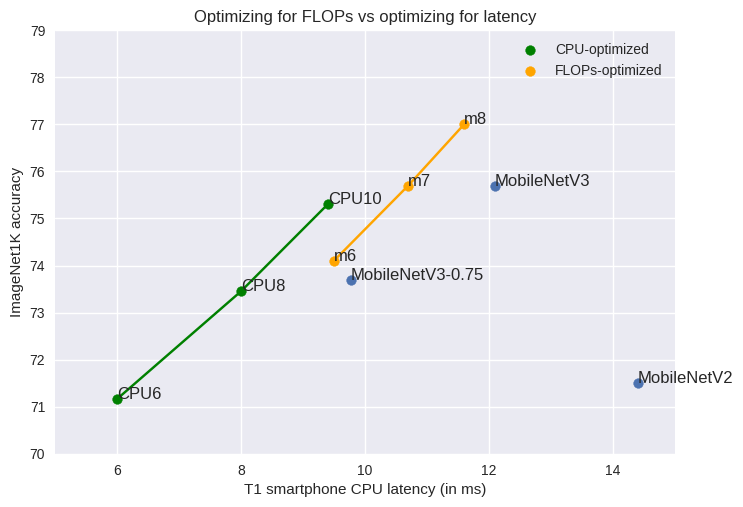

In [8]:
%matplotlib inline
fig, axes = plt.subplots(1, 1)

axes.scatter(cpu, acc)
for i, txt in enumerate(labels):
    axes.annotate(txt, (cpu[i], acc[i]), fontsize=FONTSIZE)

axes.plot(cpu_cpu, acc_cpu, color='green')
axes.scatter(cpu_cpu, acc_cpu, label='CPU-optimized', color='green')
for i, txt in enumerate(labels_cpu):
    axes.annotate(txt, (cpu_cpu[i], acc_cpu[i]), fontsize=FONTSIZE)
    
axes.plot(cpu_kmapp, acc_kmapp, color='orange')
axes.scatter(cpu_kmapp, acc_kmapp, label='FLOPs-optimized', color='orange')
for i, txt in enumerate(labels_kmapp):
    axes.annotate(txt, (cpu_kmapp[i], acc_kmapp[i]), fontsize=FONTSIZE)

axes.set_title('Optimizing for FLOPs vs optimizing for latency')
axes.set_ylim(70, 79)
axes.set_xlim(5, 15)
axes.set_xlabel('T1 smartphone CPU latency (in ms)')
axes.set_ylabel('ImageNet1K accuracy')
plt.legend()
plt.show()

### OTTAWA CPU

In [9]:
# kmapp # acc # OTTAWA cpu # 
data = {
    'MobileNetV2': [11, 71.5, 132],
    'MobileNetV3': [9, 75.7, 113],
    'MobileNetV3-0.75': [6.41, 73.7, 85],
    #'MobileNetV3-minimalistic': [8.6, 72.6, 9.8],
}

data_cpu = {
    'CPU10': [8.5, 75.3, 84],
    'CPU8': [6.9, 73.45, 75],
    'CPU6': [5.4, 71.16, 56],
}

data_kmapp = {
    'm8': [8, 77.0, 105],
    'm7': [7, 75.7, 97],
    'm6': [6, 74.1, 76],
}

In [10]:
labels = list(data.keys())
kmapp = [data[e][0] for e in labels]
acc = [data[e][1] for e in labels]
cpu = [data[e][2] for e in labels]

labels_cpu = list(data_cpu.keys())
kmapp_cpu = [data_cpu[e][0] for e in labels_cpu]
acc_cpu = [data_cpu[e][1] for e in labels_cpu]
cpu_cpu = [data_cpu[e][2] for e in labels_cpu]

labels_kmapp = list(data_kmapp.keys())
kmapp_kmapp = [data_kmapp[e][0] for e in labels_kmapp]
acc_kmapp = [data_kmapp[e][1] for e in labels_kmapp]
cpu_kmapp = [data_kmapp[e][2] for e in labels_kmapp]

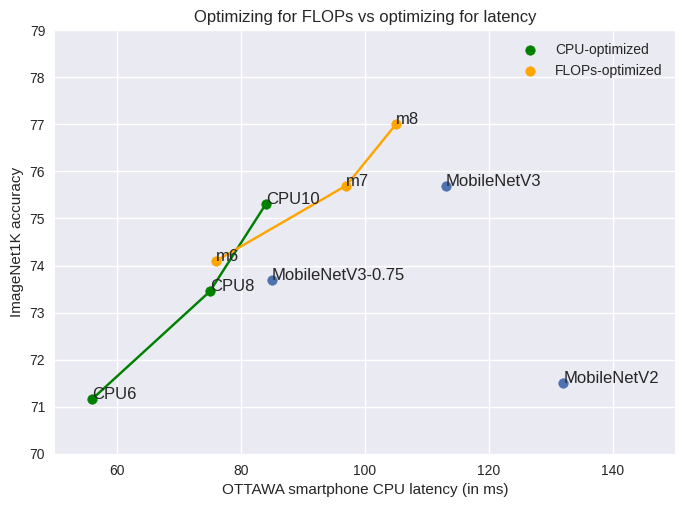

In [11]:
%matplotlib inline
fig, axes = plt.subplots(1, 1)

axes.scatter(cpu, acc)
for i, txt in enumerate(labels):
    axes.annotate(txt, (cpu[i], acc[i]), fontsize=FONTSIZE)

axes.plot(cpu_cpu, acc_cpu, color='green')
axes.scatter(cpu_cpu, acc_cpu, label='CPU-optimized', color='green')
for i, txt in enumerate(labels_cpu):
    axes.annotate(txt, (cpu_cpu[i], acc_cpu[i]), fontsize=FONTSIZE)
    
axes.plot(cpu_kmapp, acc_kmapp, color='orange')
axes.scatter(cpu_kmapp, acc_kmapp, label='FLOPs-optimized', color='orange')
for i, txt in enumerate(labels_kmapp):
    axes.annotate(txt, (cpu_kmapp[i], acc_kmapp[i]), fontsize=FONTSIZE)

axes.set_title('Optimizing for FLOPs vs optimizing for latency')
axes.set_ylim(70, 79)
axes.set_xlim(50, 150)
axes.set_xlabel('OTTAWA smartphone CPU latency (in ms)')
axes.set_ylabel('ImageNet1K accuracy')
plt.legend()
plt.show()

### PRAGUE CPU

In [12]:
# kmapp # acc # T1 cpu # 
data = {
    'MobileNetV2': [11, 71.5, 42.0],
    'MobileNetV3': [9, 75.7, 40.0],
    'MobileNetV3-0.75': [6.41, 73.7, 30.0],
    #'MobileNetV3-minimalistic': [8.6, 72.6, 9.8],
}

data_cpu = {
    'CPU10': [8.5, 75.3, 30],
    'CPU8': [6.9, 73.45, 27],
    'CPU6': [5.4, 71.16, 16],
}

data_kmapp = {
    'm8': [8, 77.0, 43],
    'm7': [7, 75.7, 42],
    'm6': [6, 74.1, 30],
}

In [13]:
labels = list(data.keys())
kmapp = [data[e][0] for e in labels]
acc = [data[e][1] for e in labels]
cpu = [data[e][2] for e in labels]

labels_cpu = list(data_cpu.keys())
kmapp_cpu = [data_cpu[e][0] for e in labels_cpu]
acc_cpu = [data_cpu[e][1] for e in labels_cpu]
cpu_cpu = [data_cpu[e][2] for e in labels_cpu]

labels_kmapp = list(data_kmapp.keys())
kmapp_kmapp = [data_kmapp[e][0] for e in labels_kmapp]
acc_kmapp = [data_kmapp[e][1] for e in labels_kmapp]
cpu_kmapp = [data_kmapp[e][2] for e in labels_kmapp]

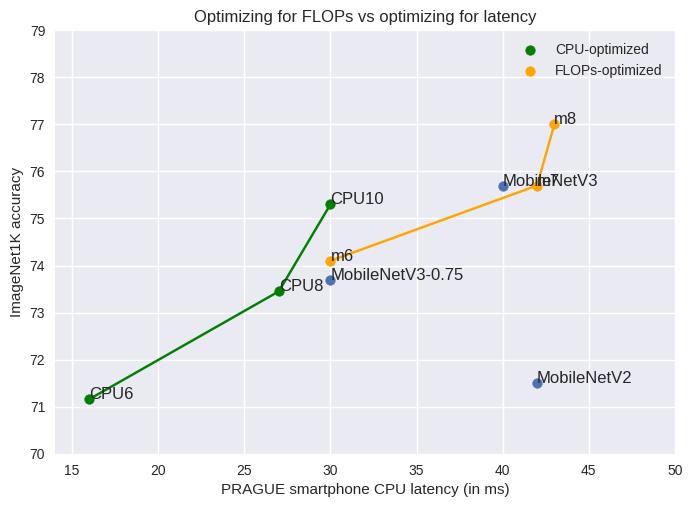

In [14]:
%matplotlib inline
fig, axes = plt.subplots(1, 1)

axes.scatter(cpu, acc)
for i, txt in enumerate(labels):
    axes.annotate(txt, (cpu[i], acc[i]), fontsize=FONTSIZE)

axes.plot(cpu_cpu, acc_cpu, color='green')
axes.scatter(cpu_cpu, acc_cpu, label='CPU-optimized', color='green')
for i, txt in enumerate(labels_cpu):
    axes.annotate(txt, (cpu_cpu[i], acc_cpu[i]), fontsize=FONTSIZE)
    
axes.plot(cpu_kmapp, acc_kmapp, color='orange')
axes.scatter(cpu_kmapp, acc_kmapp, label='FLOPs-optimized', color='orange')
for i, txt in enumerate(labels_kmapp):
    axes.annotate(txt, (cpu_kmapp[i], acc_kmapp[i]), fontsize=FONTSIZE)

axes.set_title('Optimizing for FLOPs vs optimizing for latency')
axes.set_ylim(70, 79)
axes.set_xlim(14, 50)
axes.set_xlabel('PRAGUE smartphone CPU latency (in ms)')
axes.set_ylabel('ImageNet1K accuracy')
plt.legend()
plt.show()

### MTK TV NPU

In [15]:
# kmapp # acc # T1 cpu # 
data = {
    'MobileNetV2': [11, 71.5, 42.0],
    'MobileNetV3': [9, 75.7, 40.0],
    'MobileNetV3-0.75': [6.41, 73.7, 30.0],
    #'MobileNetV3-minimalistic': [8.6, 72.6, 9.8],
}

data_npu = {
    'CPU10': [8.5, 75.3, 30],
    'CPU8': [6.9, 73.45, 27],
    'CPU6': [5.4, 71.16, 16],
}

data_kmapp = {
    'm8': [8, 77.0, 43],
    'm7': [7, 75.7, 42],
    'm6': [6, 74.1, 30],
}

## FFALCON

In [25]:
data = {
    'm0': [108, 0.328],
    'm1': [137, 0.362],
    'm2': [165, 0.383],
    'm3': [214, 0.388],
    'm4': [280, 0.390],
}

In [44]:
labels = list(data.keys())
latency = [data[e][0] for e in labels]
miou = [data[e][1] for e in labels]

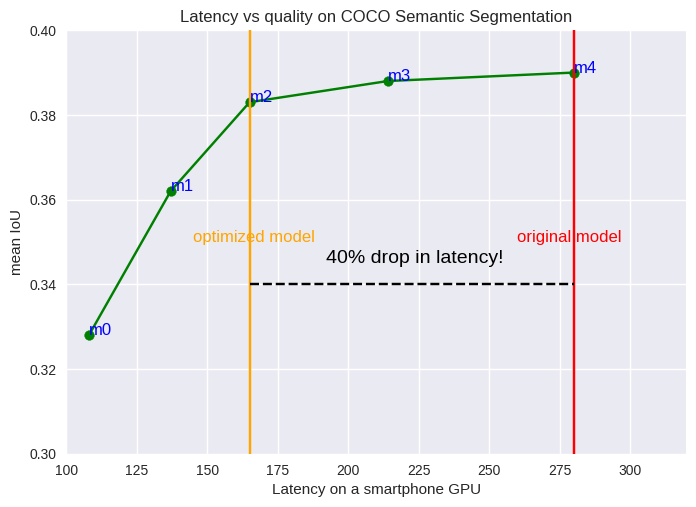

In [72]:
%matplotlib inline
fig, axes = plt.subplots(1, 1)

axes.plot(latency, miou, color='green')
axes.scatter(latency, miou, color='green')
for i, txt in enumerate(labels):
    axes.annotate(txt, (latency[i], miou[i]), fontsize=FONTSIZE, color='blue')
    
axes.axvline(x=165, color='orange')
axes.axvline(x=280, color='red')

axes.annotate('original model', (260, 0.35), fontsize=12, color='red')
axes.annotate('optimized model', (145, 0.35), fontsize=12, color='orange')

axes.plot([165, 280], [0.34, 0.34], color='black', linestyle='--')
axes.annotate('40% drop in latency!', (192, 0.345), fontsize=14, color='black')

axes.set_title('Latency vs quality on COCO Semantic Segmentation')
axes.set_ylim(0.3, 0.4)
axes.set_xlim(100, 320)
axes.set_xlabel('Latency on a smartphone GPU')
axes.set_ylabel('mean IoU')
plt.legend()
plt.show()

In [57]:
165 / 280


0.5892857142857143